In [388]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import string
%matplotlib inline 

In [389]:
def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString.lower()

In [390]:
def removeStopWords(str, set):
    toks = str.split()
    new_toks = []
    for elem in toks:
        if elem not in set:
            new_toks.append(elem)
    return string.join(new_toks, " ");

In [391]:
def printMostCommonWords(vectorizer, component):
    cuttOff = max(abs(component)) - 0.02
    for i in range(0, len(component)):
        if abs(component[i]) > cuttOff:
            for key, value in vectorizer.vocabulary_.iteritems():
                if (value == i):
                    print key

In [421]:
#vectorizer = CountVectorizer(min_df=1, stop_words = None)
#stop_words = vectorizer.get_stop_words()
stop_words = ['you', 'the', 'and', 'a', 'an', 'how', 'as', 'or', 'we', 'i', 'be']

In [422]:
removeStopWords("Hello dog, i see a good very dog", stop_words)

'Hello dog, see good very dog'

In [516]:
responses = []
rawReponses = []
grades = []
responses_w_stop_words = []
with open('schell9.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response and not "img" in response:
                rawReponses.append(response)
                grades.append(float(numericGrade))
                cleaned = cleanToLetters(response)
                responses_w_stop_words.append(cleaned)
                cleaned_no_stop_words = removeStopWords(cleaned, stop_words)
                responses.append(cleaned_no_stop_words)

In [517]:
data = {'grades' : grades, 'responses' : responses, "raw" : rawReponses}
frame = pd.DataFrame(data)
frame





,grades,raw,responses
0,91.913717,How to compute inverse trigonometry.,to compute inverse trigonometry
1,91.913717,"Figuring out what the natural domain of f is,...",figuring out what natural domain of f is given...
2,95.745009,I am still confused about inverse trig functi...,am still confused about inverse trig functions...
3,95.745009,"In general, I am a bit confused about everyth...",in general am bit confused about everything th...
4,95.745009,Daniel Garcia EID: djg2594 I had significant ...,daniel garcia eid djg had significant trouble ...
5,95.745009,I'm still confused on the three cases slide a...,im still confused on three cases slide to inde...
6,95.745009,the first question,first question
7,95.745009,Domain and range / inverse quadrants,domain range inverse quadrants
8,93.443284,i am still confused about one law of logarith...,am still confused about one law of logarithms ...
9,93.443284,"not so much confused, just needing to practic...",not so much confused just needing to practice ...


In [518]:
vectorizer = CountVectorizer(min_df=8, max_df = 0.05, ngram_range = (1, 4))

In [519]:
wordVector = vectorizer.fit_transform(responses)

In [520]:
wordVector.shape

(17306, 5295)

In [521]:
vectorizer.vocabulary_

{u'dne': 1030,
 u'find it': 1385,
 u'way that': 4981,
 u'wrong': 5274,
 u'fit': 1463,
 u'im still confuse on': 1967,
 u'to find': 4439,
 u'needed': 2859,
 u'functions their': 1605,
 u'fundamental theorem': 1614,
 u'rates questions': 3613,
 u'mostly': 2789,
 u'im doing wrong': 1929,
 u'that confused': 4172,
 u'of positive': 3113,
 u'to to find': 4585,
 u'that to': 4207,
 u'plugged in': 3380,
 u'when doing': 5050,
 u'for this': 1506,
 u'is very confusing': 2215,
 u'under curve is': 4696,
 u'still confused on review': 4003,
 u'them into': 4221,
 u'asked about': 363,
 u'chain': 585,
 u'exact': 1268,
 u'following': 1466,
 u'could go': 839,
 u'sigma notation': 3825,
 u'bit difficult': 472,
 u'of when': 3174,
 u'limit does not exist': 2494,
 u'to exist': 4431,
 u'dont really understand to': 1133,
 u'it took': 2274,
 u'opposite': 3297,
 u'where function is': 5094,
 u'local max': 2578,
 u'know to use': 2365,
 u'graphed': 1723,
 u'if graph': 1896,
 u'comes': 635,
 u'being': 449,
 u'certain funct

In [522]:
len(vectorizer.vocabulary_)

5295

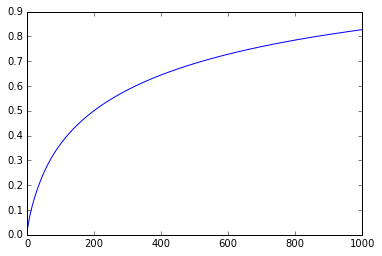

In [498]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=1000)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [523]:
# Obtain the base vectors for a 200 dimensional space.
pca = PCA(n_components=400)
pca.fit(wordVector.toarray())
sum(pca.explained_variance_ratio_)

0.64462311063742728

In [524]:
printMostCommonWords(vectorizer, pca.components_[0])

have
know


In [525]:
printMostCommonWords(vectorizer, pca.components_[1])

learning
learning module


In [526]:
printMostCommonWords(vectorizer, pca.components_[2])

rule


In [527]:
printMostCommonWords(vectorizer, pca.components_[3])

need


In [528]:
printMostCommonWords(vectorizer, pca.components_[4])

trig


In [529]:
wordVectorReduced = pca.transform(wordVector.toarray())

In [530]:
Y = np.array(grades, dtype = float)

In [531]:
X = pd.DataFrame(wordVectorReduced)

In [532]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.250487,-0.065238,-0.001898,-0.150958,-0.180212,-0.277348,-0.018725,-0.052351,0.025183,0.000877,...,-0.085012,-0.068023,0.037958,0.013942,-0.024955,0.060657,0.009576,0.030274,0.007087,0.020095
1,0.204100,-0.083837,-0.177225,0.062113,0.101026,-0.153250,0.072567,0.249501,0.169651,0.272059,...,-0.107925,0.013859,0.049111,-0.092100,-0.050349,0.085411,0.005580,-0.134163,0.009497,0.029940
2,0.001960,-0.183510,0.230545,-0.793126,-1.225950,-1.408537,-0.142930,-0.395243,0.090687,-0.033736,...,0.172738,-0.148921,-0.180282,-0.126016,0.071524,-0.197233,-0.018957,0.225754,-0.052302,-0.177221
3,0.841911,0.327884,0.107688,-1.111194,0.125664,-0.298358,0.030735,0.003563,0.004041,-0.037614,...,-0.000177,0.068938,-0.268858,0.009382,-0.019278,0.046052,0.191929,-0.061609,0.029693,-0.249880
4,0.799592,-0.093271,-0.157160,0.013874,-0.146217,-0.277579,-0.078315,-0.046018,0.111563,0.148627,...,-0.056650,-0.087539,0.037873,-0.214644,-0.102881,0.000362,-0.147657,0.029198,0.058712,0.043106


In [533]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [534]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

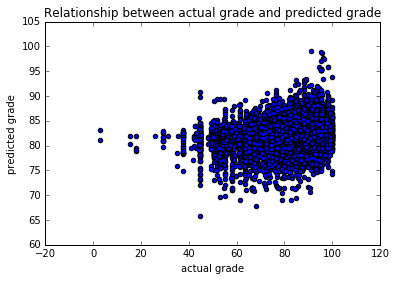

In [535]:
# your turn
plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

In [536]:
print np.mean((Y - lm.predict(X)) ** 2)

137.772085508


In [515]:
print np.mean((Y - np.mean(Y)) ** 2)

143.005976774
